<center><h1>Matplotlib</h1></center>

# 数据处理与分析

Matplotlib库是Python中用得最多的2D图形绘图库，可与Numpy库一起使用，也可以和图形工具包一起使用，如PyQt和wxPython等。

* Matplotlib设置
* 绘图种类


# 7.1 Matplotlib设置

Matplotlib是一个用于创建出版质量图标的桌面绘图包（主要是2D方面），是为python构建一个MATLAB式的绘图接口。

在Jupyter Notebook中，为了方便图形的显示，需要加入显示图像方式的代码。  
> %matplotlib inline  
%config InlineBackend.figure_format = "retina"


In [ ]:
%matplotlib inline
#%matplotlib inline是在jupyter中嵌入显示
%config InlineBackend.figure_format = 'retina'#提高图片清晰度
import matplotlib
import matplotlib.pyplot as plt

myfont = matplotlib.font_manager.FontProperties(
    fname=r'C:/Windows/Fonts/simfang.ttf')
plt.plot((1, 2, 3), (4, 3, -1))
plt.xlabel(r'横坐标', fontproperties=myfont)
plt.ylabel(r'纵坐标', fontproperties=myfont)

常见的图表及其应用场景如下:
    
**直方图:概率密度图:连续变量概率分布的估计。**  
**条形图:适用于类别型变量，用来表示数据的多少，条形可以横置或纵置。**   
**箱线图:反映连续变量的数据分布，也可进行多组数据的分布比较。**  
**散点图:用于分析两个连续型变量之间的相互关系。**  
**折线图:一般表示随时间序列而变化的连续数据。**  
**饼图:用于统计类别型变量中每个类别的占比。**  

# 7.2 Matplotlib三层次接口

**Matplotlib 的三层次接口主要是容器层、图像层和辅助显示层接口**

容器层主要由Canvas、Figure、Axes组成。Canvas是位于底层的系统层，在绘图的过程中充当画板的角色，即放置画布(Figure)的工具。Figure是Canvas上方的第一层，也是需要用户操作的应用层的第一层，在绘图过程中充当画布的角色。Axes是应用层的第二层，在绘图过程中相当于画布上绘图区的角色。

图像层是指 Axes 内通过 plot()、scatter()、bar()、histogram()、pie()等函数根据数据绘制出的图像

辅助显示层为Axes(绘图区)内的除了根据数据绘制出的图像以外的内容，主要包括Axes外观(face color)、边框线(spines)、坐标轴(axis)、坐标轴名称(axislabel)、坐标轴刻度(tick)坐标轴刻度标签(ticklabel)、网格线(grid)、图例(legend)、标题(title)等内容。该层的设置可使图像显示更加直观，更加容易被用户理解，但又不会对图像产生实质的影响

**掌握了 Matplotlib 三层结构后，在后续画图过程中思路会非常清晰。**

# 7.3 创建画布与子图

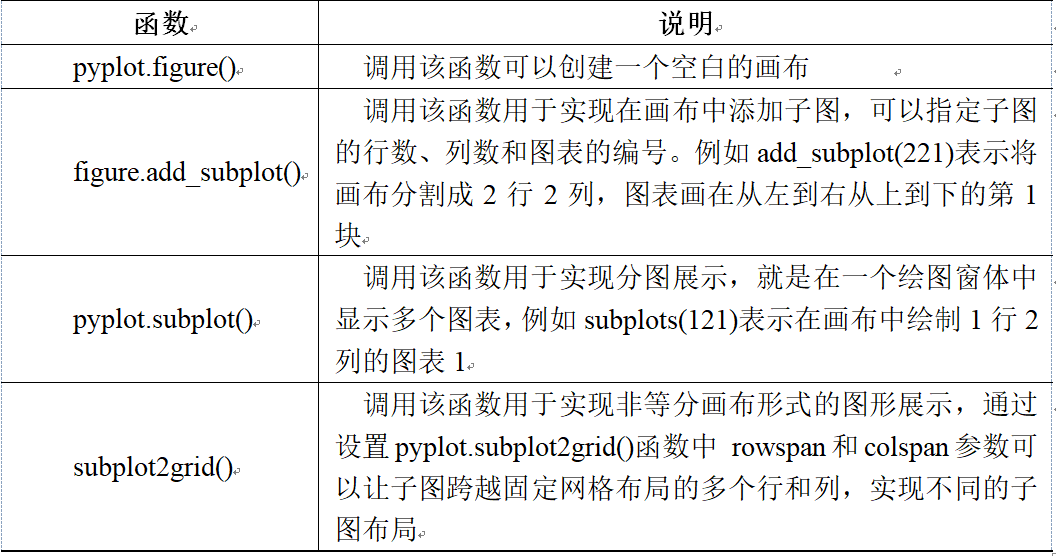

## 创建画布figure()

#### pyplot模块中默认有一个Figure对象，该对象可以理解为一张空白的画布，用于容纳图表的各种组件。


<img src="image/Chapter7_2.png"  width="600" height="600">

例如，在默认的画布上绘制简单的图形：

 ### （1）plt.figure(num = None,figsize = None,dpi = None,facecolor = None,edgecolor = None, ...,** kwargs)

- num   -- 表示图形的编号或名称。
- figsize   -- 用于设置画布的尺寸。
- facecolor -- 用于设置画板的背景颜色。
- edgecolor -- 用于显示边框颜色。



还可以在创建画布时为其添加背景颜色，即设置facecolor参数

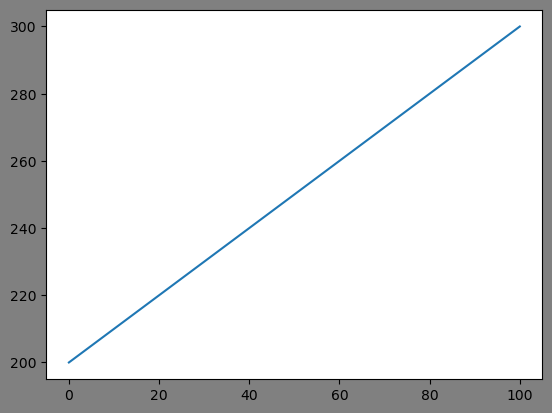

In [6]:
import numpy as np
data_two = np.arange(200, 301)
# 创建背景为灰色的新画布
plt.figure(facecolor='gray')
# 通过data2绘制折线图
plt.plot(data_two)
plt.show() 	


**如果希望一次性创建一组子图，则可以通过subplots()函数进行实现。**
### （2）plt.subplot(numRows, numCols, plotNum)



图表的整个绘图区域被分成numRows行和numCols列，然后按照从**左到右、从上到下**的顺序对每个子区域进行编号，左上的子区域的编号为1，plotNum参数指定创建的Axes对象所在的区域。
<img src="image/Chapter7_1.png"  width="600" height="600">

如果numRows＝2, numCols＝3，那么整个绘制图表平面会被划分成2×3个图片区域，用坐标表示为：
> (1, 1), (1, 2), (1, 3)  
(2, 1), (2, 2), (2, 3)


subplots()函数会返回一个元组，**元组的第一个元素为Figure对象（画布）**， **第二个元素为Axes对象**（子图，包含坐标轴和画的图）或Axes对象数组。如果创建的是单个子图，则返回的是一个Axes对象，否则返回的是一个Axes对象数组。


还可以通过Figure类的add_subplot()方法添加和选中子图。


### （3）plt.add_subplot(* args,** kwargs )


上述方法中，\*args参数表示一个三位数的实数或三个独立的实数，用于描述子图的位置。比如“a, b, c”，其中a和b表示将Figure对象分割成a\*b大小的区域，c表示当前选中的要操作的区域。


调用add_subplot()方法时传入的是“2,2,1”，则会在的2*2的矩阵中编号为1的区域上绘图。


<img src="image/Chapter7_3.png"  width="600" height="600">

每调用一次add_subplot()方法只会规划画布划分子图，且只会添加一个子图。当调用plot()函数绘制图形时，会画在最后一次指定子图的位置上。


### plt.rcParams() 


> ### from matplotlib import pyplot as plt
> ### plt.rcParams["xxx"] = "xxxxx"



matplotlib使用matplotlibrc 配置文件来自定义各种属性，我们称之为rc配置或者rc参数。   



# 常用绘图函数

- ## plot()：用于绘制线图和散点图 
- ## subplots()：用于创建子图
- ## scatter()：用于绘制散点图  
- ## bar()：用于绘制垂直条形图和水平条形图  
- ## hist()：用于绘制直方图
- ## pie()：用于绘制饼图
- ## imshow()：用于绘制图像



## 1．点图和线图（plot）、散点图（scatter）

点图和线图可以用来表示二维数据之间的关系，是查看两个变量之间关系的最直观的方法。可以通过plot()函数来得到。
使用subplot()函数绘制多个子图图像，并且添加X,Y坐标轴的名称，并且添加标题。代码如下。


调用matplotlib.pyplot库绘图，其plot()函数调用方式如下： 

### （1） plt.plot([x], y, [format_string], *, data=None, **kwargs)  ， plt.plot([x], y, [format_string], [x2], y2, [format_string], ..., **kwargs)



参数说明如下。  
- x: x轴数据，列表或数组，可选。  
- y: y轴数据，列表或数组。  
- format_string: 控制曲线的格式字符串，可选。  
- **kwargs: 第二组或更多，(x,y,format_string)。  

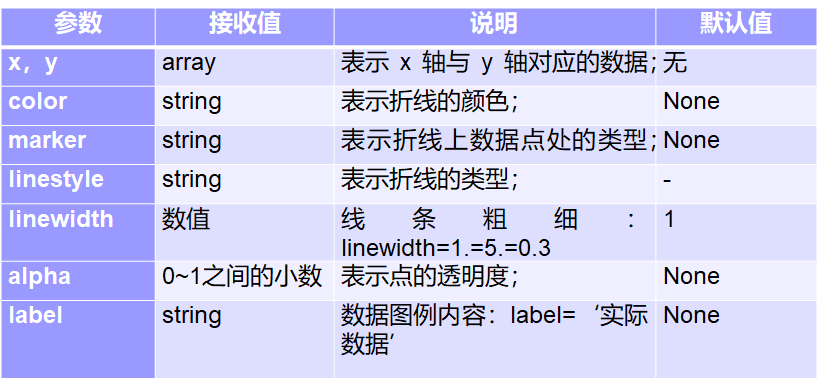


### format_string
由颜色字符、风格字符、标记字符组成

#### 颜色字符举例：
- ‘b’ ：蓝色
- ‘c’： 青绿色
- ‘g’： 绿色
- ‘k’ ：黑色
- ‘m’：洋红色
- ‘r’： 红色
- ‘w’：白色
- ‘y’： 黄色

#### 风格字符举例：
- ‘‐’ 实线
- ‘‐‐’ 破折线
- ‘‐.’ 点划线
- ‘:’ 虚线
- ‘’ ’ ’ 无线条

#### 标记字符举例：
- ‘.’ 点标记
- ‘,’ 像素标记(极小点)
- ‘o’ 实心圈标记
- ‘v’ 倒三角标记
- ‘^’ 上三角标记
- ‘>’ 右三角标记
- ‘<’ 左三角标记

### kwargs
这是一大堆可选内容，可以来里面指定很多内容，如“label”指定线条的标签，“linewidth”指定线条的宽度，等等
常用的几个：
- color 指定颜色
- label 线条的标签
- linestyle 线条的风格
- linewidth 线条的宽度

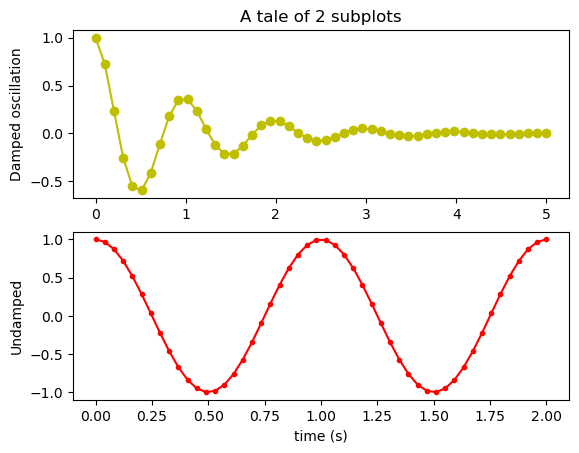

In [2]:
## subplot()绘制多个子图 
import numpy as np
import matplotlib.pyplot as plt

## 生成X
x1 = np.linspace(0.0, 5.0)  #在起止点之间均匀取值，默认取50个点
x2 = np.linspace(0.0, 2.0)

## 生成Y
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

## 绘制第一个子图
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

## 绘制第二个子图
plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()
# plt.savefig('/path')


当plotNum＝3时，表示的坐标为（1, 3），即第一行第三列的子图位置。如果numRows、numCols和plotNum这三个数都小于10的话，可以把它们缩写为一个整数。例如，subplot(323)和subplot(3,2,3)是相同的。
subplot在plotNum指定的区域中创建一个轴对象。如果新创建的轴和之前创建的轴重叠，之前的轴将被删除。  


## pyplot模块中提供了为图形添加标签的函数。


<img src="image/Chapter7_4.png"  width="600" height="600">

这些函数之间是并列关系，没有先后顺序，我们既可以先绘制图形，也可以先添加标签。值得一提的是，图例的添加只能在绘制完图形之后。


如果要设置的图表标题中含有中文字符，则会变成方格子而无法正确显示。


<img src="image/Chapter7_5.png"  width="600" height="600">

实际上Matplotlib是支持中文编码的，造成这种情况主要是因为Matplotlib库的配置信息里面没有中文字体的相关信息!

在python脚本中动态设置matplotlibrc，这样就可以避免由于更改配置文件而造成的麻烦!
> ### from pylab import mpl  
> ### \# 设置显示中文字体  
> ### mpl.rcParams[‘font.sans-serif] = [‘SimHei’]   


另外，由于字体更改以后，会导致坐标轴中的部分字符无法正常显示，这时需要更改axes.unicode_minus参数。
> ### \# 设置正常显示符号
> ### mpl.rcParams['axes.unicode_minus'] = False


 以上是线图，再来看点图scatter()函数。  
<h3>（2）plt.scatter(x,y,c='r',linewidths=lValue,marker='o')</h3>

参数说明如下。  
- x：数组。  
- y：数组。  
- c：表示颜色。  
- linewidths：点的大小。  
- marker：点的形状!  

其中颜色b表示blue，c表示cyan，g表示green，k表示black，r表示red，w表示white，y表示yellow。
形状的表示有：“.”表示点，“o”表示圆圈，“D”表示钻石，“*”表示五角星。


[1 2 3 4 5 6 7 8 9]


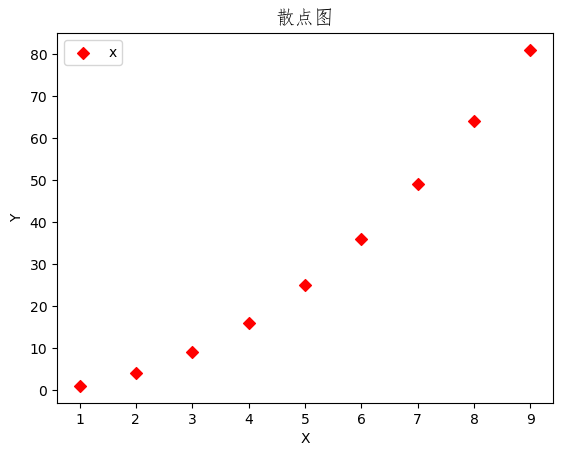

In [7]:
#导入必要的模块 
import numpy as np 
import matplotlib.pyplot as plt 
## 设置字体
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = "C:/Windows/Fonts/simfang.ttf ",size=14)
#产生测试数据 
x = np.arange(1,10) 
print(x)
y = x**2 

#设置标题 
plt.title('散点图',fontproperties = font) 
#设置X轴标签 
plt.xlabel('X') 
#设置Y轴标签 
plt.ylabel('Y') 
#画散点图 
plt.scatter(x,y,c = 'r',marker = 'D') 
#设置图标 
plt.legend('x1') 
#显示所画的图 
plt.show()

## 2．直方图（hist）

我们使用 **hist()** 函数来绘制向量的直方图，计算出直方图的概率密度，并且绘制出概率密度曲线，在标注中使用数学表达式，示例代码如下

hist()函数调用方式如下。
> ### n, bins, patches = plt.hist(arr, bins=10, density =0, facecolor='black', edgecolor='black',alpha=1， histtype='bar')

hist的参数非常多，但常用的就这几个，**只有第一个是必须的**，后面几个是可选的。  

- ### arr：直方图的一维数组x。  
- ### bins：直方图的柱数，可选项，默认为10。  
- ### density：表示频率或密度，原来的normed参数已经不用了。  density=True表示频率分布  density=False表示的是概率密度分布  
- ### facecolor：直方图颜色。  
- edgecolor：直方图边框颜色。  
- ### alpha：透明度。  
- histtype：直方图类型，可选项为bar,barstacked,step,stepfilled。  

返回值如下。  
-  n：直方图向量，是否归一化由参数normed设定。  
- bins：返回各个bin的区间范围。  
- patches：返回每个bin里面包含的数据，是一个list。  



`stats.norm.pdf` 正态分布概率密度函数.

标准形式是:


$$
f(x)=\frac{\exp \left(-x^{2} / 2\right)}{\sqrt{2 \pi}}
$$

[-0.05566905 -0.8904457   1.59230824  1.05101257 -0.56404608  1.2936027
  0.25126671 -0.28203426  0.83760103 -2.37397969]
x: (10000,)


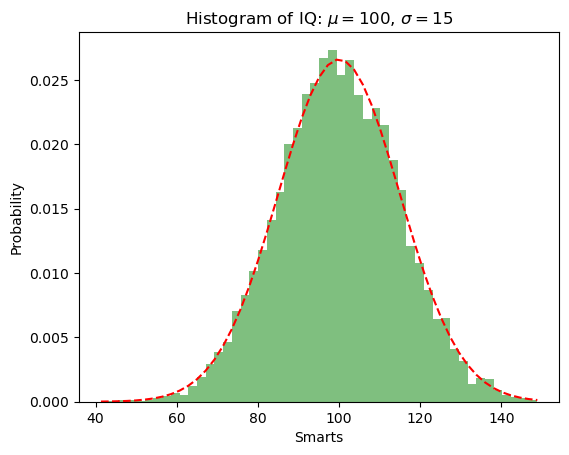

bind:
 [ 41.34648101  43.49662846  45.6467759   47.79692334  49.94707079
  52.09721823  54.24736568  56.39751312  58.54766057  60.69780801
  62.84795546  64.9981029   67.14825035  69.29839779  71.44854523
  73.59869268  75.74884012  77.89898757  80.04913501  82.19928246
  84.3494299   86.49957735  88.64972479  90.79987224  92.95001968
  95.10016713  97.25031457  99.40046201 101.55060946 103.7007569
 105.85090435 108.00105179 110.15119924 112.30134668 114.45149413
 116.60164157 118.75178902 120.90193646 123.05208391 125.20223135
 127.35237879 129.50252624 131.65267368 133.80282113 135.95296857
 138.10311602 140.25326346 142.40341091 144.55355835 146.7037058
 148.85385324]


In [8]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# example data
mu = 100   # 分布的均值
sigma = 15  # 分布的标准差
x = mu + sigma * np.random.randn(10000)
print("x:",x.shape)
## 直方图的条数
num_bins = 50
#绘制直方图
# matplotlib版本问题，最新版本已经没有这个属性了。normed参数替换成 density 即可。 density=True：表示的是频率直方图
# n, bins, patches = plt.hist(x, num_bins, normed=1, facecolor='green', alpha=0.5)
n, bins, patches = plt.hist(x, num_bins, density=True, facecolor='green', alpha=0.5)
#添加一个最佳拟合和曲线
y =norm.pdf(bins, mu, sigma) #返回关于数据的pdf数值（概率密度函数）
plt.plot(bins, y, 'r--')
plt.xlabel('Smarts')
plt.ylabel('Probability')
## 在图中添加公式需要使用latex的语法（$ $）
plt.title('Histogram of IQ: $\mu=100$, $\sigma=15$')
# 调整图像的间距，防止y轴数值与label重合
plt.subplots_adjust(left=0.15)
plt.show()
print("bind:\n",bins)


## 3．等值线图 （contour） 
等值线图又称等量线图，是以相等数值点的连线表示连续分布且逐渐变化的数量特征的一种图形，是用数值相等各点联成的曲线（等值线）在平面上的投影来表示被摄物体的外形和大小的图。  
我们可以使用contour()函数将三维图像在二维空间上表示，并使用clabel()函数在每条线上显示数据值的大小。


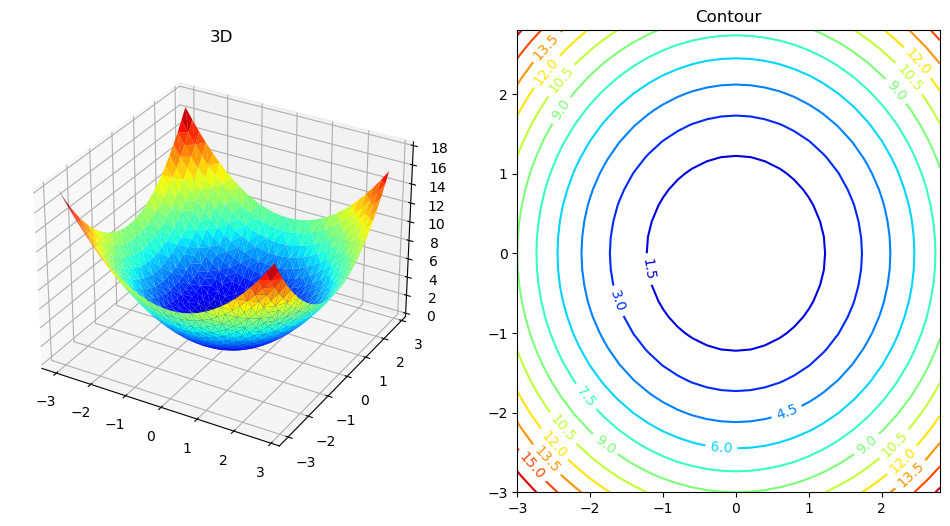

In [3]:
## matplotlib绘制3d图像
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 生成数据
delta = 0.2
x = np.arange(-3, 3, delta)
y = np.arange(-3, 3, delta)
X, Y = np.meshgrid(x, y)
# numpy.meshgrid函数用于从两个给定的一维数组中创建一个矩形网格，代表笛卡尔索引或矩阵索引。
# https://geek-docs.com/numpy/numpy-tutorials/numpy-meshgrid-function.html
Z = X**2 + Y**2
x=X.flatten()#返回一维的数组，但该函数只适用于numpy对象（array或者mat）
y=Y.flatten()
z=Z.flatten()
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121, projection='3d')
# plot_trisurf()函数创建一个基本的三曲面图
ax1.plot_trisurf(x,y,z, cmap=cm.jet, linewidth=0.01) 
#cmap指颜色，默认绘制为RGB(A)颜色空间，jet表示“蓝-青-黄-红”颜色
plt.title("3D")
ax2 = fig.add_subplot(122)

# contour 仅仅是画出等高线
cs = ax2.contour(X, Y, Z,15,cmap='jet', ) 
#注意这里是大写X，Y，Z。这里15代表的是显示等高线的密集程度，数值越大，画的等高线数就越多
# 添加数据标签
ax2.clabel(cs, inline=True, fontsize=10, fmt='%1.1f')
plt.title("Contour")
plt.show()


### plot_trisur和plot_surace都是matplotib库中用于绘制三维图形的函数，但它们的区别在于plot_tisurf可以绘制三角形网格，而plot_surface只能绘制矩形网格。因此，如果需要绘制三角形网格的三维图形，应该使用plot_trisurf函数。

## 4．三维曲面图  （plot_surface）


三维曲面图通常用来描绘三维空间的数值分布和形状。我们可以通过plot_surface()函数来得到想要的图像，示例代码如下。

[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]]


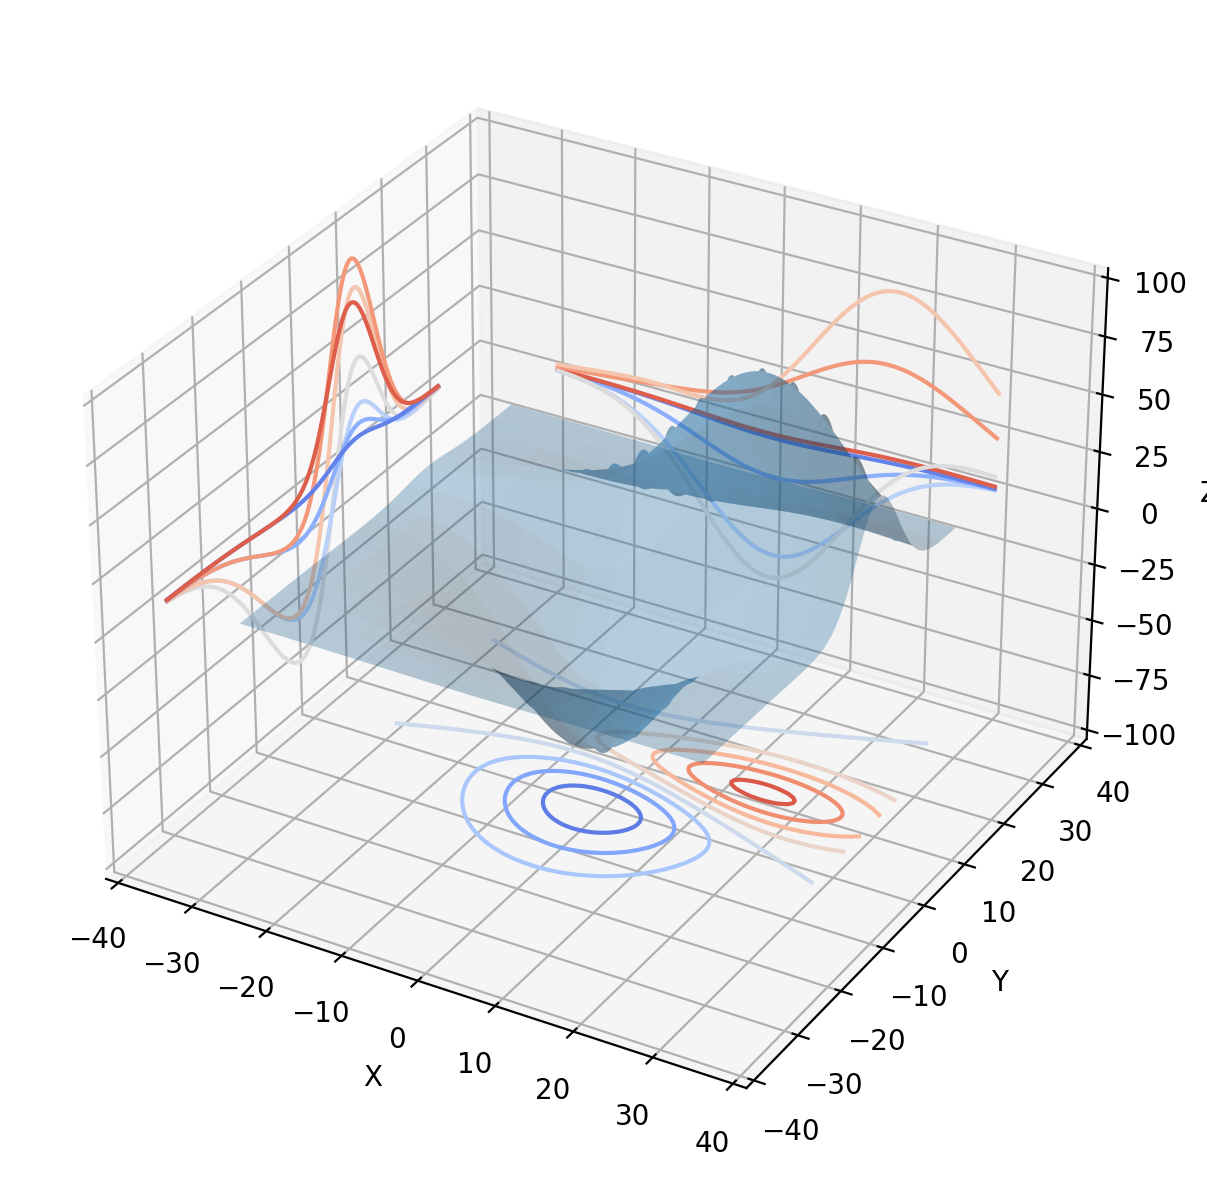

In [29]:
## 三维图像＋各个轴的投影等高线
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
fig = plt.figure(figsize=(8,6))
# ax = fig.gca(projection='3d')
# issues https://stackoverflow.com/questions/76047803/typeerror-figurebase-gca-got-an-unexpected-keyword-argument-projection
ax = fig.add_subplot(projection = '3d')
## 生成三维测试数据
X, Y, Z = axes3d.get_test_data(0.05)

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)
plt.show()

`add_subplot` 方法的 `projection` 参数用于指定子图的投影类型，即决定子图是二维的还是三维的，以及如何绘制图形。`projection` 参数有几个可选值，每个值对应不同类型的绘图投影。以下是一些常用的 `projection` 类型及其含义：

### 1. 'rectilinear' (默认值)
这是默认的二维直角坐标系，用于普通的二维图形绘制。

```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='rectilinear')
# 这与不指定 projection 参数时的效果相同
ax.plot([1, 2, 3], [1, 4, 9])
plt.show()
```

### 2. 'polar'
用于绘制极坐标图。

```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
theta = np.linspace(0, 2*np.pi, 100)
r = np.abs(np.sin(theta))
ax.plot(theta, r)
plt.show()
```

### 3. '3d'
用于绘制三维图形。需要先导入 `mpl_toolkits.mplot3d` 模块。

```python
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
z = [0, 1, 2, 3, 4]
ax.plot(x, y, z)
plt.show()
```

### 4. 'aitoff'
用于绘制艾托夫投影图，通常用于天文学中的全天空地图。

```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='aitoff')
ax.grid(True)
plt.show()
```

### 5. 'hammer'
用于绘制哈默-艾托夫投影图，也常用于天文学。

```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='hammer')
ax.grid(True)
plt.show()
```

### 6. 'lambert'
用于绘制兰伯特投影图。

```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='lambert')
ax.grid(True)
plt.show()
```

### 7. 'mollweide'
用于绘制摩尔怀德投影图，主要用于显示球面数据。

```python
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
ax.grid(True)
plt.show()
```

### 8. 自定义投影
Matplotlib 允许用户定义自己的投影。可以通过创建自定义的 `Projection` 类并注册它来实现。

以下是使用自定义投影的一个示例（假设已定义并注册了 `MyProjection` 类）：

```python
from my_custom_projections import MyProjection

fig = plt.figure()
ax = fig.add_subplot(111, projection='my_projection')
# 使用自定义投影绘制图形
plt.show()
```



## 5．条形图（bar）

条形图（Bar Chart）也称条图、条状图、棒形图、柱状图，是一种以长方形的长度为变量的统计图表。条形图用来比较两个或两个以上的数值（不同时间或者不同条件），通常用于较小的数据集分析。条形图也可横向排列，或用多维方式表达。


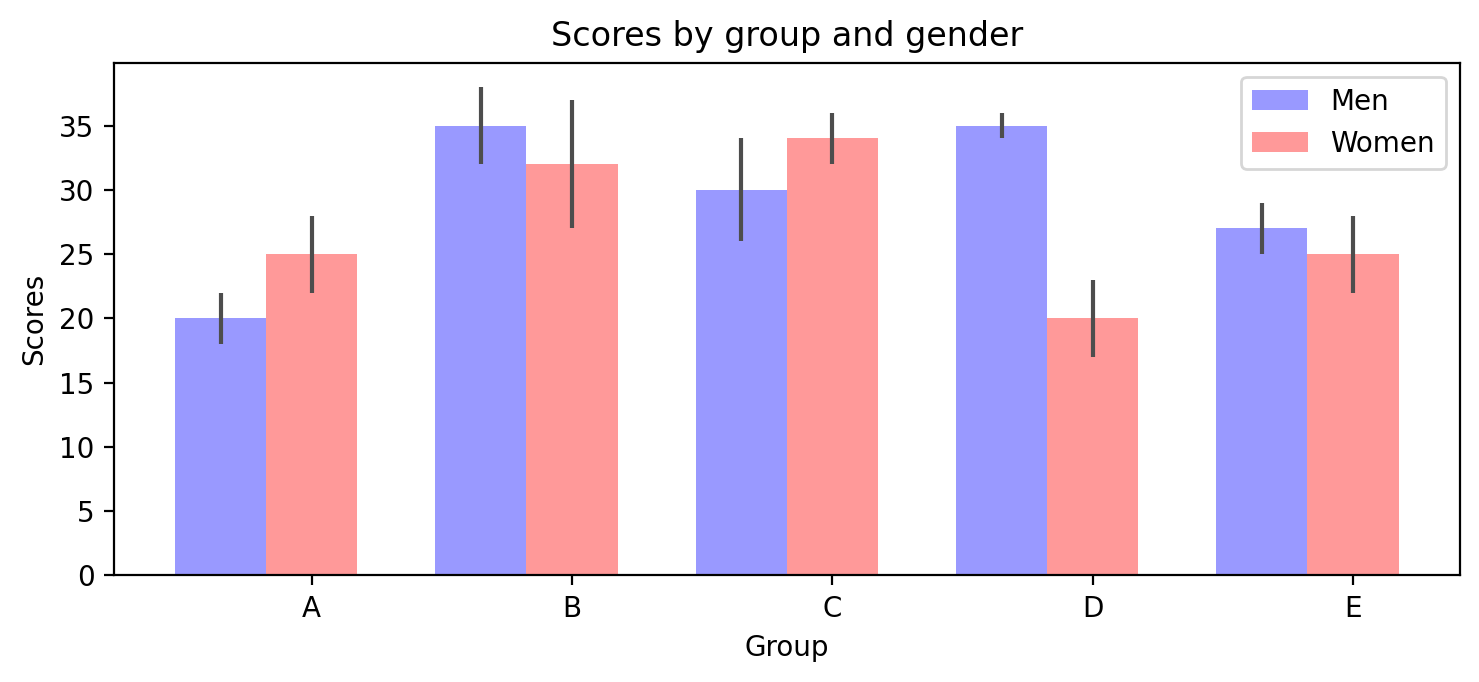

In [26]:
import numpy as np
import matplotlib.pyplot as plt

##生成数据
n_groups = 5 # 组数
#平均分和标准差
means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()
#生成0，1，2，3，...
index = np.arange(n_groups)
bar_width = 0.35 # 条的宽度
opacity = 0.4    #颜色透明度参数
error_config = {'ecolor': '0.3'}
#条形图中的第一类条
rects1 = plt.bar(index, means_men, bar_width, #坐标、数据、条的宽度
                  alpha=opacity,     #颜色透明度
                  color='b',
                   yerr=std_men,   # xerr、yerr分别针对水平、垂直型误差
                   error_kw=error_config,  #设置误差记号的相关参数
                   label='Men')
#条形图中的第二类条
rects2 = plt.bar(index + bar_width, means_women, bar_width,
                     alpha=opacity,
                     color='r', yerr=std_women,
              error_kw=error_config, label='Women')
plt.xlabel('Group')
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(index + bar_width, ('A', 'B', 'C', 'D', 'E'))
plt.legend() # 显示标注

#自动调整subplot的参数给指定的填充区
plt.tight_layout()
plt.show()


## 6．饼图（pie）

饼图或称饼状图，是一个划分为几个扇形的圆形统计图表，用于描述量、频率或百分比之间的相对关系。在饼图中，每个扇区的弧长（以及圆心角和面积）大小为其所表示的数量的比例。这些扇区合在一起刚好是一个完全的圆形。顾名思义，这些扇区拼成了一个切开的饼形图案。


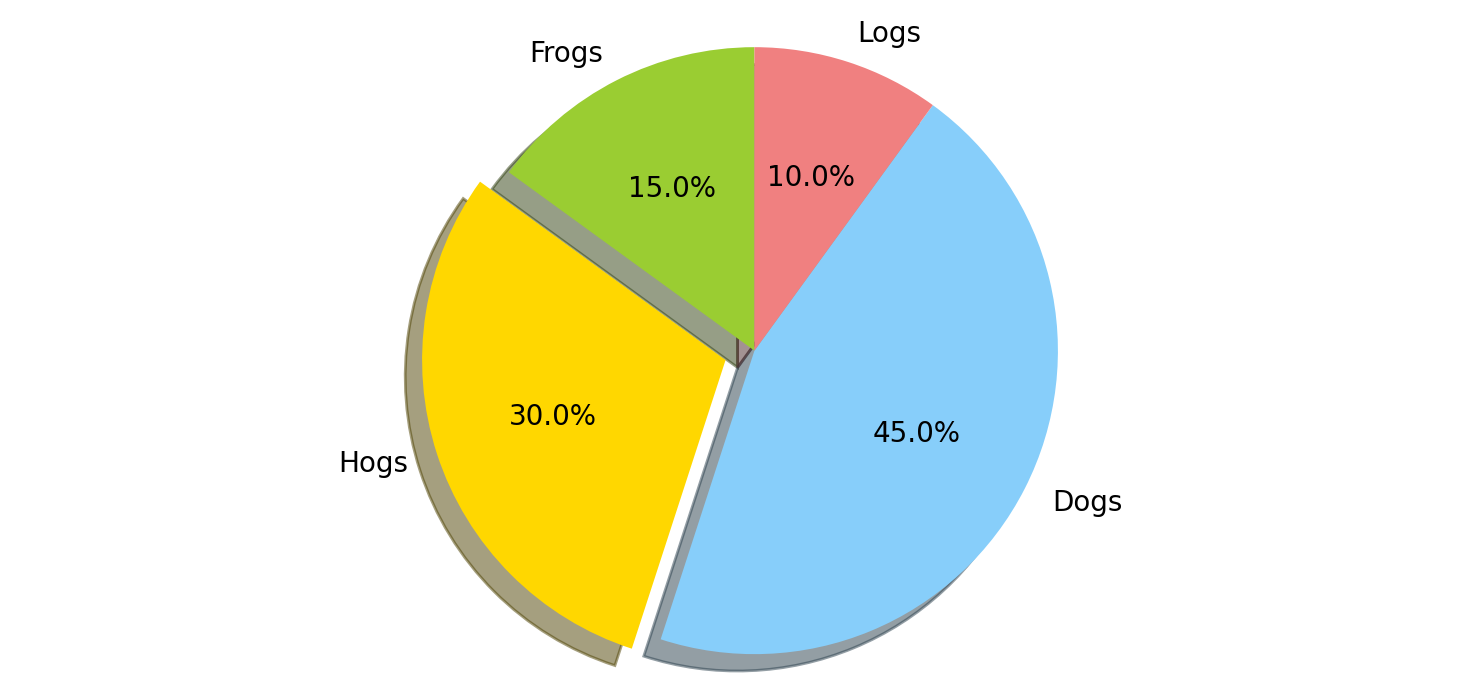

In [27]:
##饼图
import matplotlib.pyplot as plt

##切片将按顺时针方向排列并绘制
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'## 标注
sizes = [15, 30, 45, 10] ## 大小
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral'] ## 颜色
##0.1代表第二个块从圆中分离出来
explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')
##绘制饼图
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()


## 7．气泡图（散点图scatter）  
气泡图是散点图的一种变体，通过每个点的面积大小，反映第三维。气泡图可以表示多维数据，并且可以通过对颜色和大小的编码表示不同的维度数据。例如，使用颜色对数据分组，使用大小来映射相应值的大小。可以通过scatter()函数得到气泡图，示例程序如下。


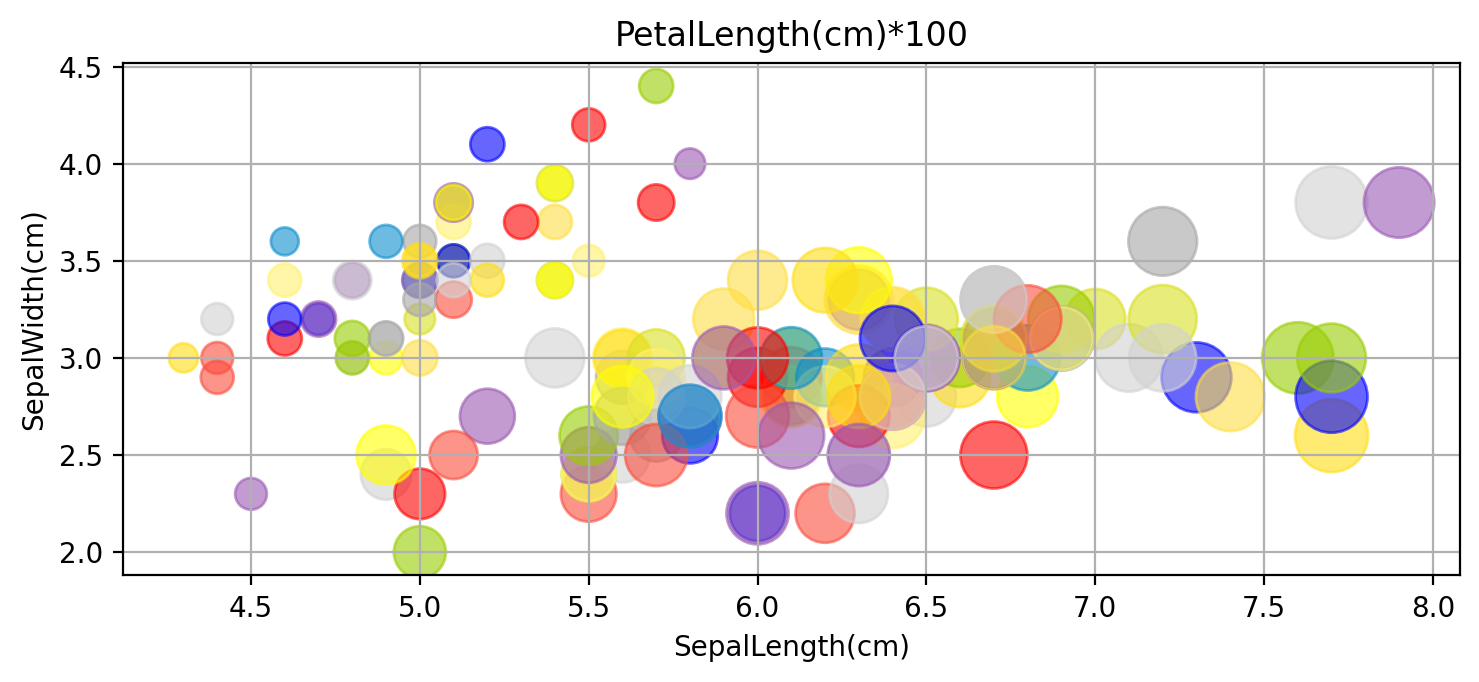

In [28]:
##气泡图（散点图）
# -*- coding: utf-8 -*-
"""
Created on Sat May 16 01:50:19 2020
@author: cucn
"""

import matplotlib.pyplot as plt
import pandas as pd

##导入数据
df_data = pd.read_excel(r'file/i_nuc.xls',sheet_name='iris')
df_data.head()
##作图
fig, ax = plt.subplots()
#设置气泡图颜色
colors = ["#99CC01","#FFFF01","#0000FE","#FE0000","#A6A6A6",
            "#D9E021",'#FFF16E','#0D8ECF','#FA4D3D','#D2D2D2',
            '#FFDE45','#9b59b6','#D2D1D2','#FFDE15','#9b59b1']*10
#创建气泡图SepalLength为x， SepalWidth为y，同时设置PetalLength为气泡大小，并设置颜色透明度等。
ax.scatter(df_data['SepalLength'], df_data['SepalWidth'], 
s=df_data['PetalLength']*100,
color=colors,
alpha=0.6)
#第三个变量s表明根据[PetalLength]*100数据显示气泡的大小，color参数也可省略 
ax.set_xlabel('SepalLength(cm)')
ax.set_ylabel('SepalWidth(cm)')
ax.set_title('PetalLength(cm)*100')

#显示网格
ax.grid(True)
fig.tight_layout()
plt.show()



# 7.4 实战体验：南丁格尔玫瑰图

根据给定数据，绘制南丁格尔玫瑰图，也就是在极坐标系中绘制柱状图。 

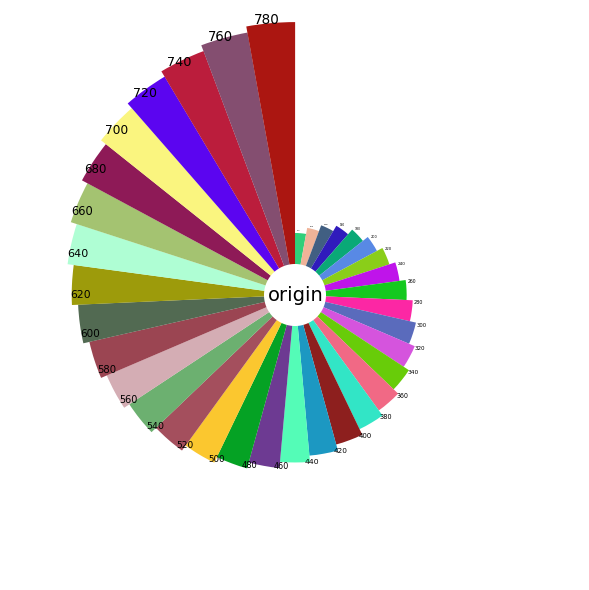

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

fig=plt.figure(figsize=(10, 6))
#极坐标轴域
ax=plt.subplot(111, projection='polar')
#顺时针
ax.set_theta_direction(-1)
#正上方为0度
ax.set_theta_zero_location('N')

#测试数据
r = np.arange(100, 800, 20)
theta = np.linspace(0, np.pi*2, len(r), endpoint=False)
#绘制柱状图
ax.bar(theta, r,    #角度对应位置，半径对应高度
       width=0.18,  #宽度
       color=np.random.random((len(r),3)),#颜色
       align='edge',#从指定角度的径向开始绘制
       bottom=100)#远离圆心，设置偏离距离
#在圆心位置显示文本
ax.text(np.pi*3/2-0.2,90,'origin',fontsize=14)
#每个柱的顶部显示文本表示大小
for angle,height in zip(theta,r):
    ax.text(angle+0.03,height+105,str(height),fontsize=height/80)
#不显示坐标轴和网格线
plt.axis('off')
#紧凑布局，缩小外边距
plt.tight_layout()

plt.savefig('image/polarBar.png',dpi=480) #保存的南丁格尔玫瑰图


`plt.plot`、`plt.subplot`、`fig.add_subplot` 和 `plt.subplots` 是 Matplotlib 中常用的绘图和布局函数，它们在创建和排列图表方面有不同的用途。下面是它们的区别和用法：



### 1. `plt.plot`
`plt.plot` 是用来绘制简单的二维线图的函数。

示例：


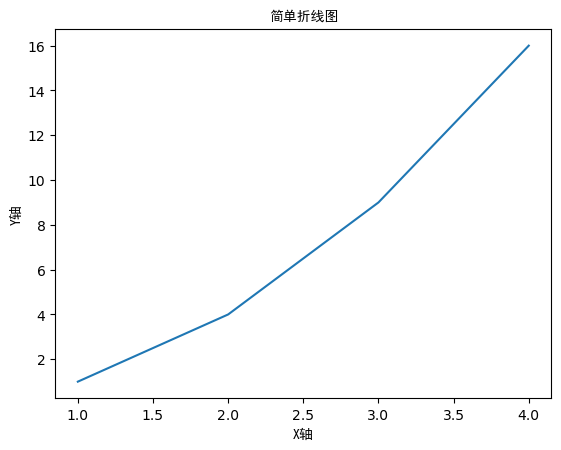

In [5]:

import matplotlib.pyplot as plt


from matplotlib.font_manager import FontProperties
font_path = "C:\\Windows\\Fonts\\simhei.ttf"  # 黑体字体路径
font_prop = FontProperties(fname=font_path)
# 简单的折线图
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
plt.plot(x, y)
plt.xlabel('X轴', fontproperties=font_prop)
plt.ylabel('Y轴', fontproperties=font_prop)
plt.title('简单折线图', fontproperties=font_prop)
plt.show()




### 2. `plt.subplot`
`plt.subplot` 用于创建一个单个图形的多个子图。它按照网格布局（行和列）排列子图。

语法：
```python
plt.subplot(nrows, ncols, index)
```
- `nrows` 是子图的行数
- `ncols` 是子图的列数
- `index` 是子图的编号，从1开始，从左到右、从上到下依次递增

示例：


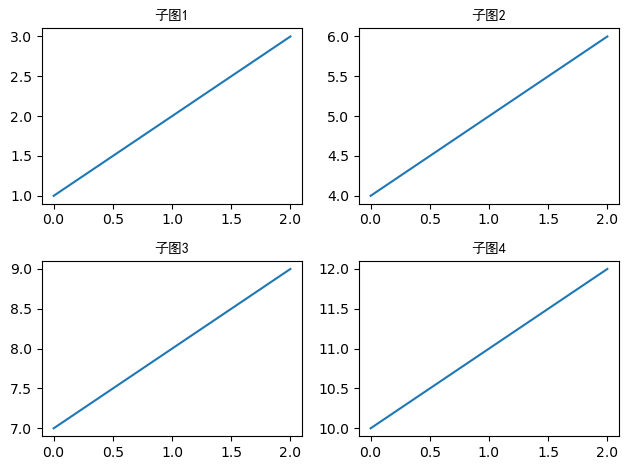

In [6]:

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(2, 2, 1)  # 2行2列的第1个子图
plt.plot([1, 2, 3])
plt.title('子图1', fontproperties=font_prop)

plt.subplot(2, 2, 2)  # 2行2列的第2个子图
plt.plot([4, 5, 6])
plt.title('子图2', fontproperties=font_prop)

plt.subplot(2, 2, 3)  # 2行2列的第3个子图
plt.plot([7, 8, 9])
plt.title('子图3', fontproperties=font_prop)

plt.subplot(2, 2, 4)  # 2行2列的第4个子图
plt.plot([10, 11, 12])
plt.title('子图4', fontproperties=font_prop)

plt.tight_layout()
plt.show()



### 3. `fig.add_subplot`
`fig.add_subplot` 与 `plt.subplot` 类似，但它是通过 `Figure` 对象（即 `fig`）来添加子图。

示例：

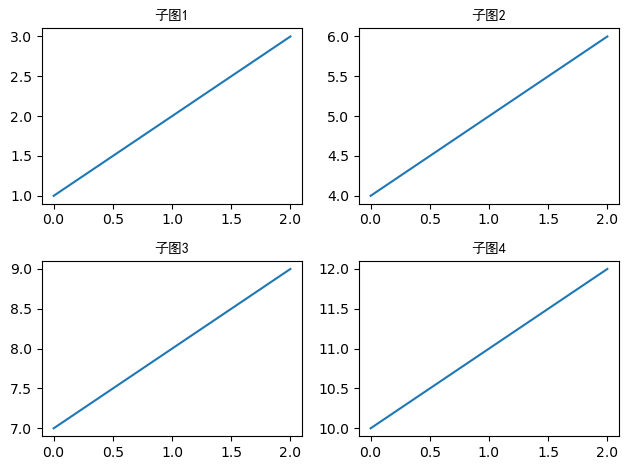

In [7]:


import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)  # 2行2列的第1个子图
ax1.plot([1, 2, 3])
ax1.set_title('子图1', fontproperties=font_prop)

ax2 = fig.add_subplot(2, 2, 2)  # 2行2列的第2个子图
ax2.plot([4, 5, 6])
ax2.set_title('子图2', fontproperties=font_prop)

ax3 = fig.add_subplot(2, 2, 3)  # 2行2列的第3个子图
ax3.plot([7, 8, 9])
ax3.set_title('子图3', fontproperties=font_prop)

ax4 = fig.add_subplot(2, 2, 4)  # 2行2列的第4个子图
ax4.plot([10, 11, 12])
ax4.set_title('子图4', fontproperties=font_prop)

fig.tight_layout()
plt.show()




### 4. `plt.subplots`
`plt.subplots` 是一个更高级的函数，创建一个包含多个子图的 Figure 对象，并返回一个包含所有子图的数组。它更简洁，更适合需要对多个子图进行批量操作的情况。

示例：

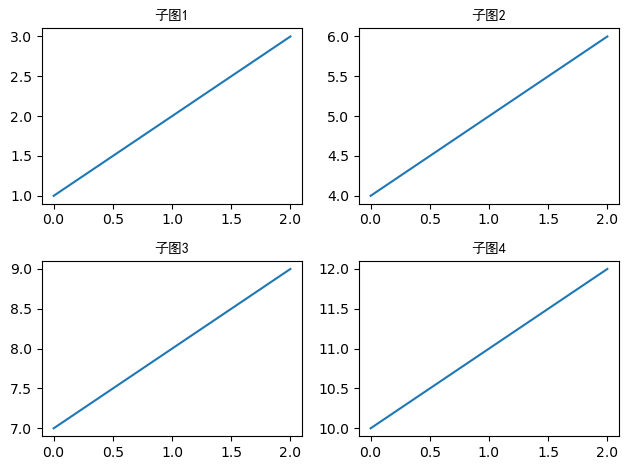

In [8]:


import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2)  # 创建2行2列的子图

axes[0, 0].plot([1, 2, 3])
axes[0, 0].set_title('子图1', fontproperties=font_prop)

axes[0, 1].plot([4, 5, 6])
axes[0, 1].set_title('子图2', fontproperties=font_prop)

axes[1, 0].plot([7, 8, 9])
axes[1, 0].set_title('子图3', fontproperties=font_prop)

axes[1, 1].plot([10, 11, 12])
axes[1, 1].set_title('子图4', fontproperties=font_prop)

fig.tight_layout()
plt.show()




### 总结
- `plt.plot`: 用于绘制简单的二维线图。
- `plt.subplot`: 用于在单个图形中创建多个子图，按照网格布局排列。
- `fig.add_subplot`: 与 `plt.subplot` 类似，但通过 `Figure` 对象添加子图。
- `plt.subplots`: 创建一个包含多个子图的 Figure 对象，并返回子图数组，适合对多个子图进行批量操作。

希望这些解释和示例能帮助你理解和使用这些函数绘制图表。